# MEA definition

This notebook shows how MEA can be using a .yaml file and how MEA models can be added and removed to and from the file system.

In [9]:
import MEAutility as MEA
from pprint import pprint
import matplotlib.pylab as plt

### List available MEAs:

In [24]:
MEA.return_mea()

Available MEA: 
 ['SqMEA-6-25um', 'SqMEA-10-15um', 'tetrode', 'Neuroseeker-128', 'SqMEA-5-30um', 'SqMEA-15-10um', 'Neuronexus-32-Kampff', 'Neuronexus-32-cut-30', 'Neuropixels-128', 'Neuroseeker-128-Kampff', 'Neuropixels-24', 'SqMEA-7-20um', 'Neuronexus-32', 'Neuropixels-384']


These MEA are saved during installation. Each MEA corresponds to a .yaml file containing key information for the MEA. Let's take a look at some examples.

### Square MEA

In [5]:
sqmea_info = MEA.return_mea_info('SqMEA-10-15um')
pprint(sqmea_info)

{'dim': 10,
 'electrode_name': 'SqMEA-10-15um',
 'pitch': 15,
 'shape': 'square',
 'size': 5,
 'sortlist': None,
 'type': 'mea'}


The returned dictionary corresponds the the .yaml file. For this MEA model `dim` is a single `int` and `pitch` is a single `int` (or `float`). Therefore, a 10x10 Square MEA is instantiated with 15um pitch in the yz direction (if `plane` is not in the yaml file, `yz` is default). The electrodes `shape` is `square`, and half the side length is 5um. Since `sortlist` is `None`, the electrode count starts from the bottom left and it follows the rows up and then goes to the next column (the last index is the electrode on the top right). The `type` `mea` will be used for plotting.

Let's now instantiate a MEA object:

In [15]:
sqmea = MEA.return_mea('SqMEA-10-15um')
print(type(sqmea))
print(sqmea.number_electrodes)
print(sqmea.dim)

'plane' field with 2D dimensions assumed to be 'yz
Model is set to semi
<class 'MEAutility.core.RectMEA'>
100
[10, 10]


The MEA is a rectangular MEA with 100 electrodes. 

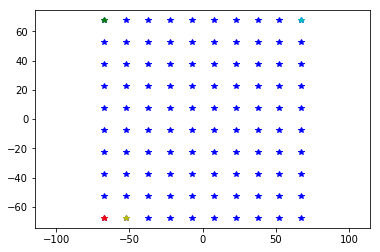

In [31]:
plt.plot(sqmea.positions[:, 1], sqmea.positions[:, 2], 'b*')
plt.plot(sqmea.positions[0, 1], sqmea.positions[0, 2], 'r*')
plt.plot(sqmea.positions[9, 1], sqmea.positions[9, 2], 'g*')
plt.plot(sqmea.positions[10, 1], sqmea.positions[10, 2], 'y*')
plt.plot(sqmea.positions[-1, 1], sqmea.positions[-1, 2], 'c*')
_ = plt.axis('equal')

Rectangular MEAs can be handled as matrices, where the first inex is the ROW and the second index is the COLUMN:

In [23]:
print(sqmea[0][0].position) # electrode 0
print(sqmea[9][0].position) # electrode 9
print(sqmea[0][1].position) # electrode 10
print(sqmea[-1][-1].position) # electrode 99

[  0.  -67.5 -67.5]
[  0.  -67.5  67.5]
[  0.  -52.5 -67.5]
[ 0.  67.5 67.5]


### Rectangular MEA

In [17]:
neuroseeker_info = MEA.return_mea_info('Neuroseeker-128')
pprint(neuroseeker_info)

{'dim': [32, 4],
 'electrode_name': 'Neuroseeker-128',
 'pitch': 22.5,
 'shape': 'square',
 'size': 10.0,
 'sortlist': None,
 'type': 'mea'}


This MEA is rectangular, with 32 rows, 4 columns, and a regular pitch of 22.5um

In [14]:
neuroseeker = MEA.return_mea('Neuroseeker-128')
print(type(neuroseeker))
print(neuroseeker.number_electrodes)
print(neuroseeker.dim)

'plane' field with 2D dimensions assumed to be 'yz
Model is set to semi
<class 'MEAutility.core.RectMEA'>
128
[32, 4]


[   0.    -33.75 -348.75]
[  0.   -33.75 348.75]
[   0.    -33.75 -326.25]
[  0.    33.75 348.75]


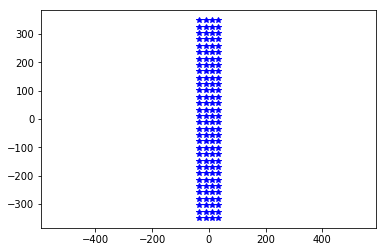

In [30]:
plt.plot(neuroseeker.positions[:, 1], neuroseeker.positions[:, 2], 'b*')
_ = plt.axis('equal')
print(neuroseeker[0][0].position) # electrode 0
print(neuroseeker[31][0].position) # electrode 31
print(neuroseeker[1][0].position) # electrode 32
print(neuroseeker[-1][-1].position) # electrode 127

### General MEA

When `dim` and `pitch` is are single `int` (or `float` for `pitch`) or a list of 2 values, a rectangular MEA is created. Some MEA configuration can be different.

In [26]:
neuronexus_info = MEA.return_mea_info('Neuronexus-32')
pprint(neuronexus_info)

{'dim': [10, 12, 10],
 'electrode_name': 'Neuronexus-32',
 'pitch': [25.0, 18.0],
 'shape': 'circle',
 'size': 7.5,
 'sortlist': None,
 'stagger': -12.5,
 'type': 'mea'}


For this MEA there are 3 different options:
- `dim` has 3 elements
- `pitch` hass 2 elements
- `stagger` is present

When len(`dim`) > 2, then each element represents the number of rows of each column. In this case, there are 3 columns: the first and third have 10 electrodes, the second one has 12.

The first value of `pitch` is the inter-row distance (top to bottom). The second value is the inter-column distance (left to right).

The `stagger` key allows the shift colimns. If only one value is given (`int` or `float`) every other column starting from he second one is staggered. Otherwise `stagger` can be a list with the same number of elements of `dim`.

Given this information, we can wxpect how the neuronexus MEA looks like:

'plane' field with 2D dimensions assumed to be 'yz
Model is set to semi


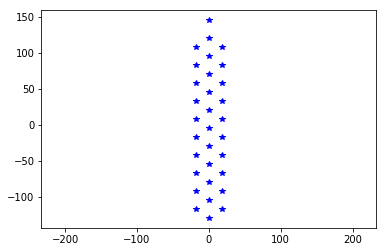

In [29]:
neuronexus = MEA.return_mea('Neuronexus-32')
plt.plot(neuronexus.positions[:, 1], neuronexus.positions[:, 2], 'b*')
_ = plt.axis('equal')

## Adding and removing MEA models

It is possible to load user-defined yaml files in the MEAutility package, so that they are available from the entire file system.

Let's first create a `user.yaml` file on-the-fly.

In [1]:
import yaml, os

user_info = {'dim': [10, 12, 9, 8],
             'electrode_name': 'user',
             'pitch': [10.0, 40.0],
             'shape': 'circle',
             'size': 7.5,
             'sortlist': None,
             'stagger': [0, -12, 30, -22],
             'type': 'mea'}

with open('user.yaml', 'w') as f:
    yaml.dump(user_info, f)
    
yaml_files = [f for f in os.listdir('.') if f.endswith('.yaml')]
print(yaml_files)

['user.yaml']


Now we can add the newly created yaml file to the MEA package:

In [35]:
MEA.add_mea('user.yaml')

Available MEA: 
 ['SqMEA-6-25um', 'SqMEA-10-15um', 'tetrode', 'Neuroseeker-128', 'SqMEA-5-30um', 'SqMEA-15-10um', 'Neuronexus-32-Kampff', 'Neuronexus-32-cut-30', 'Neuropixels-128', 'Neuroseeker-128-Kampff', 'Neuropixels-24', 'SqMEA-7-20um', 'Neuronexus-32', 'user', 'Neuropixels-384']


and create a `user` MEA object:

'plane' field with 2D dimensions assumed to be 'yz
Model is set to semi


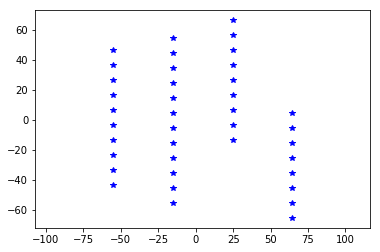

In [36]:
usermea = MEA.return_mea('user')
plt.plot(usermea.positions[:, 1], usermea.positions[:, 2], 'b*')
_ = plt.axis('equal')

If we don't need the `user` MEA anymore, we can remove it from the MEA package:

In [37]:
MEA.remove_mea('user')

Removed:  /home/alessiob/anaconda3/envs/mearec/lib/python3.6/site-packages/MEAutility/electrodes/user.yaml
Available MEA: 
 ['SqMEA-6-25um', 'SqMEA-10-15um', 'tetrode', 'Neuroseeker-128', 'SqMEA-5-30um', 'SqMEA-15-10um', 'Neuronexus-32-Kampff', 'Neuronexus-32-cut-30', 'Neuropixels-128', 'Neuroseeker-128-Kampff', 'Neuropixels-24', 'SqMEA-7-20um', 'Neuronexus-32', 'Neuropixels-384']
